## Predict H1N1 and Seasonal Flu Vaccines
- predict prob for 2 flu vaccines
- model: binary classification/labeled supervised learning
- dataset: https://www.drivendata.org/competitions/66/flu-shot-learning/data/

### 1. Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [2]:
train_X=pd.read_csv("training_set_features.csv")
train_y=pd.read_csv("training_set_labels.csv")
test_df=pd.read_csv("test_set_features.csv")
train_df=pd.merge(train_X,train_y,on="respondent_id")
train_df=train_df.set_index('respondent_id')
train_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
train_df.shape

(26707, 37)

In [4]:
train_df.isna().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_seasonal            2160
doctor_recc_h1n1                2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [5]:
del_col=['employment_occupation','employment_industry','health_insurance']
train_df.drop(del_col,axis=1,inplace=True)
train_df=train_df.dropna()
train_df.isna().sum().sort_values(ascending=False)

seasonal_vaccine               0
behavioral_touch_face          0
opinion_h1n1_vacc_effective    0
health_worker                  0
child_under_6_months           0
chronic_med_condition          0
doctor_recc_seasonal           0
doctor_recc_h1n1               0
behavioral_outside_home        0
h1n1_vaccine                   0
behavioral_large_gatherings    0
behavioral_wash_hands          0
behavioral_face_mask           0
behavioral_avoidance           0
behavioral_antiviral_meds      0
h1n1_knowledge                 0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

### 2. Data Exploration

In [6]:
train_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,...,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,1.615518,1.302566,0.049435,0.740454,0.067712,0.834895,0.353274,0.330058,0.685012,0.225995,...,3.922258,2.359892,2.347622,4.060483,2.757102,2.104979,0.903218,0.551064,0.229814,0.477955
std,0.888246,0.596258,0.216780,0.438397,0.251258,0.371285,0.477999,0.470246,0.464523,0.418247,...,0.982311,1.291151,1.353140,1.062052,1.387503,1.325909,0.746290,0.938224,0.420724,0.499527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


#### Take away:
- comparing to 75%, max for `total_rooms`, `population`, `households` need a further check.
- abnormal data for target col `median_house_value`.

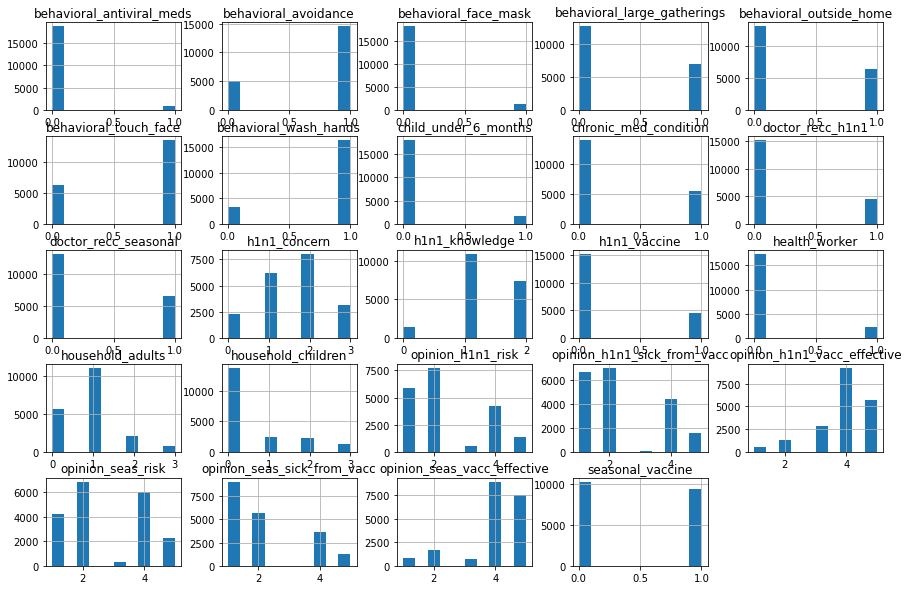

In [7]:
train_df.hist(figsize=(15,10))
plt.show()

**categorical**:
- behavioral_antiviral_meds      float64
- behavioral_avoidance           float64
- behavioral_face_mask           float64
- behavioral_wash_hands          float64
- behavioral_large_gatherings    float64
- behavioral_outside_home        float64
- behavioral_touch_face          float64

- chronic_med_condition          float64
- child_under_6_months           float64

- doctor_recc_h1n1               float64
- doctor_recc_seasonal           float64

- health_worker                  float64

### 3. Feature Engineering

In [8]:
#binary classification, if over threshold, label as 1, otherwise, label as 0.
#threshold= 0.8 
#train_df["h1n1_vaccine"] = (train_df["h1n1_vaccine"] > threshold).astype(float)

In [9]:
num_var=list(train_df.select_dtypes(include=np.number))
print(len(num_var),num_var)

24 ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine']


In [10]:
cat_var=list(train_df.select_dtypes(include=np.object))
print(len(cat_var),cat_var)

10 ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']


In [11]:
add_cat_list=['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask',
             'behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home',
             'behavioral_touch_face','chronic_med_condition','child_under_6_months',
             'doctor_recc_h1n1','doctor_recc_seasonal','health_worker']

In [12]:
i=0
for i in range(len(add_cat_list)):
    train_df.loc[(train_df[add_cat_list[i]]==0),add_cat_list[i]]=False
    train_df.loc[(train_df[add_cat_list[i]]==1),add_cat_list[i]]=True
    i+=1

In [13]:
cat_var.extend(add_cat_list)
print(len(cat_var),cat_var)

22 ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'chronic_med_condition', 'child_under_6_months', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'health_worker']


In [14]:
#train_df[cat_var[21]].value_counts()

In [15]:
ode_list=[cat_var[0],cat_var[1],cat_var[4],]

ohe_list=[cat_var[2],cat_var[3],cat_var[5],cat_var[6],cat_var[7],cat_var[8],cat_var[9],cat_var[10],cat_var[11],
          cat_var[12],cat_var[13],cat_var[14],cat_var[15],cat_var[16],cat_var[17],cat_var[18],cat_var[19],
          cat_var[20],cat_var[21]]

In [16]:
num_var=set(num_var)-set(add_cat_list)
print(len(num_var),num_var)

12 {'household_children', 'h1n1_vaccine', 'h1n1_concern', 'opinion_seas_risk', 'household_adults', 'seasonal_vaccine', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc', 'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective'}


In [17]:
train_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,False,False,False,False,False,True,True,False,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,False,True,False,True,False,True,True,False,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
3,1.0,1.0,False,True,False,True,True,False,False,False,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,False,True,False,True,True,False,True,False,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,False,True,False,True,False,False,True,False,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0,0


#### 1) num_var

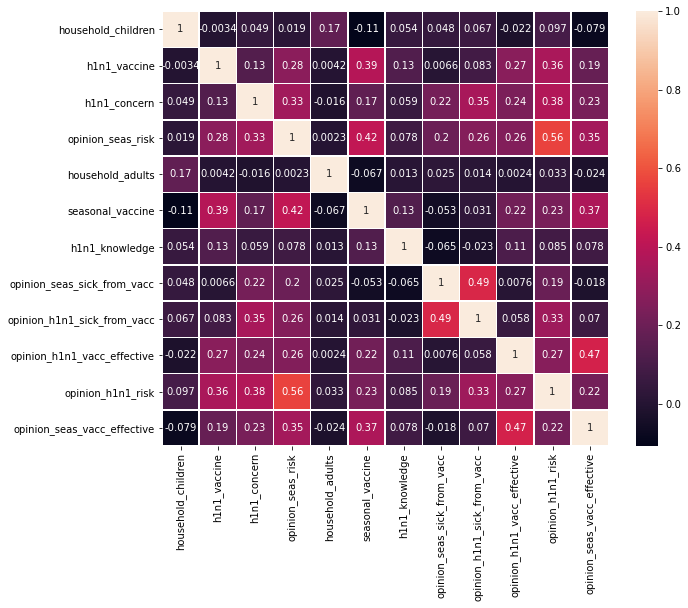

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df[num_var].corr(),annot=True,linewidths=.5)

In [19]:
train_df.corr().h1n1_vaccine.sort_values(ascending=False)

h1n1_vaccine                   1.000000
seasonal_vaccine               0.388223
opinion_h1n1_risk              0.355359
opinion_seas_risk              0.278787
opinion_h1n1_vacc_effective    0.272866
opinion_seas_vacc_effective    0.185614
h1n1_concern                   0.134136
h1n1_knowledge                 0.125878
opinion_h1n1_sick_from_vacc    0.082710
opinion_seas_sick_from_vacc    0.006583
household_adults               0.004196
household_children            -0.003418
Name: h1n1_vaccine, dtype: float64

In [20]:
train_df.corr().seasonal_vaccine.sort_values(ascending=False)

seasonal_vaccine               1.000000
opinion_seas_risk              0.415801
h1n1_vaccine                   0.388223
opinion_seas_vacc_effective    0.365565
opinion_h1n1_risk              0.233296
opinion_h1n1_vacc_effective    0.215492
h1n1_concern                   0.167132
h1n1_knowledge                 0.126241
opinion_h1n1_sick_from_vacc    0.030772
opinion_seas_sick_from_vacc   -0.053237
household_adults              -0.067250
household_children            -0.108026
Name: seasonal_vaccine, dtype: float64

#### 2)cat_var

In [21]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
ohe=OneHotEncoder()
ode=OrdinalEncoder()

cat_ohe=ohe.fit_transform(train_df[ohe_list])
cat_ode=ode.fit_transform(train_df[ode_list])

### Train/Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
trainset_df, valid_df= train_test_split(train_df,test_size=0.22, random_state=123)
print("Total df size: %i\n trainset_df size: %i \n valid_df size: %i"\
%(train_df.shape[0],trainset_df.shape[0],valid_df.shape[0]))

### 4. Modeling

### 4.1 Build a Baseline Model
Logistic Regression

In [ ]:
X_train=trainset_df[cat_var]
X_train

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100, class_weight = 'balanced', max_iter = 1000)
model.fit(X_train,y_train)

Y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print('Logistic Regression')
print('acc:', accuracy_score(Y_test, y_pred))
print('rec:', recall_score(Y_test, y_pred))
print('F1:', f1_score(Y_test, y_pred))